In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [50]:
rawdata = pd.read_csv("all_features.csv")
rawdata["econ_cum"] = rawdata["contain_econ"].cumsum()

In [51]:
rawdata.head()

,date,contain_hum,tweetct,contain_econ,Confirmed,Deaths,Recovered,econ_cum
0,2020-01-30,31,77,17,8142,171,135,17
1,2020-01-31,11,41,6,9814,213,214,23
2,2020-02-01,3,10,2,11910,259,275,25
3,2020-02-02,1,1,1,16651,361,463,26
4,2020-02-03,1,3,1,19742,425,614,27


In [52]:
lineregdata = rawdata[["Confirmed", "econ_cum"]]
lineregdata.head()

,Confirmed,econ_cum
0,8142,17
1,9814,23
2,11910,25
3,16651,26
4,19742,27


In [53]:
X = rawdata["Confirmed"].values.reshape(-1,1)
y = rawdata["econ_cum"].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
regr = LinearRegression()  
regr.fit(X_train, y_train) #training the algorithm

# Make predictions using the testing set
y_pred = regr.predict(X_test)


In [48]:
#To retrieve the intercept:
print(regr.intercept_)
# The coefficients
print(regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % metrics.r2_score(y_test, y_pred))

[-479.45237679]
[[0.00900872]]
Mean squared error: 103838.46
Coefficient of determination: 0.82


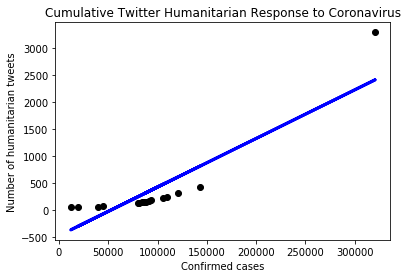

In [49]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Cumulative Twitter Humanitarian Response to Coronavirus')
plt.xlabel('Confirmed cases')
plt.ylabel('Number of humanitarian tweets')
plt.xticks()
plt.yticks()

plt.show()

In [83]:
def my_logistic(t, a, b, c):
    return c / (1 + a * np.exp(-b/t))
p0 = np.random.exponential(size=3)
p0

array([0.20718455, 0.4716465 , 0.4125052 ])

In [84]:
bounds = (0, [10000000., 4., 1000000.])

In [85]:
import scipy.optimize as optim
x = np.array(lineregdata['Confirmed']) + 1
y = np.array(lineregdata['econ_cum'])

(a, b, c),cov = optim.curve_fit(my_logistic, x, y, bounds = bounds, p0=p0)

In [86]:
a,b,c

(0.17226272789481975, 1.4291153647505786e-07, 348.3389746393317)

In [87]:
def my_logistic(t):
    return c / (1 + a * np.exp(-b/t))

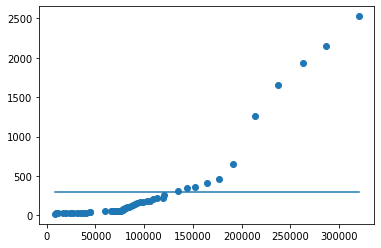

In [88]:
plt.scatter(x, y)
plt.plot(x, my_logistic(x))
